<a href="https://colab.research.google.com/github/Alex-Zeo/BTCvsDoge/blob/main/btc_or_doge_allocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crypto Analysis README

I was curious wondering if I should diversify my crypto portfolio to include DOGE coin. This README provides an in-depth overview of the data analysis conducted on Bitcoin and Dogecoin, detailing the insights derived from financial metrics and statistical models.

### **Regression DataFrame (`regression_df`)**

- **Description:**  
  Evaluates the predictive relationships (in a linear sense) between one cryptocurrency's returns and another's.:
  - Actual Bitcoin returns
  - Dogecoin returns (current and lagged by one and two weeks)
  - Predicted Bitcoin returns from the regression model

- **Purpose:**  
  It helps assess the extent to which Dogecoin's past and present returns explain variations in Bitcoin's returns.

### **Rolling Correlation DataFrame**

- **Description:**  
  Informs about the dynamic relationship between the two assets over time..

- **Insight:**  
  It reveals the evolving relationship between the two cryptocurrencies, showing periods when they move in sync or diverge.

### **Volatility DataFrame**

- **Description:**  
  Shows the changing level of uncertainty or risk in cryptocurrency’s returns.

- **Significance:**  
  High volatility suggests more unpredictable and potentially higher-risk price changes.
  
## Installation

If you want to run this script locally:
1) comment out the `pip` installs because this is intended for a google colab enviornment.
2) Ensure that you have `Python` installed on your system and in your `PATH`. Install the necessary dependencies using `pip`:

```bash
pip install yfinance seaborn matplotlib pandas
```

## Usage

To execute the dashboard, simply click play in google colab:

```bash
Run All:    ⌘/Ctrl+F9
```

Running the script will display a dual-axis chart illustrating the 5-year week over week percentage change of Bitcoin and Dogecoin, allowing you to visualize and compare their market performances seamlessly.

In [ ]:
# Install required libraries (if not already installed)
!pip install -q yfinance seaborn matplotlib pandas statsmodels arch

# BTC vs Doge Weekly Returns

Leveraging Yahoo Finance's historical data, this script fetches weekly price information, and visualizes a comparison of the performance trajectories of these two prominent cryptocurrencies BTC and DOGE

Utilizing the `yfinance` library for data retrieval and `seaborn` alongside `matplotlib` for enhanced graphical design. Comprehensive logging is integrated to provide real-time feedback during data fetching and processing, ensuring transparency and ease of debugging. I encountered many bugs throughout this process ha.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Starting Comprehensive Crypto Analysis...
Date range set from 2019-12-17 to 2024-12-14.

Fetching data for BTC-USD from Yahoo Finance...
Data fetch for BTC-USD completed successfully.

Fetching data for DOGE-USD from Yahoo Finance...
Data fetch for DOGE-USD completed successfully.

Data fetched successfully for the following cryptocurrencies:
- Bitcoin
- Dogecoin


Aligning data by date...
Data alignment completed successfully.

Combined Price DataFrame:
                Bitcoin  Dogecoin
Date                             
2019-12-16  7511.588867  0.002115
2019-12-23  7422.652832  0.002068
2019-12-30  7411.317383  0.002419
2020-01-06  8192.494141  0.002381
2020-01-13  8706.245117  0.002405


Calculating cumulative percentage changes for all cryptocurrencies...
Calculating cumulative percentage change for Bitcoin...
Cumulative percentage change calculation for Bitcoin completed.
Calculating cumulative percentage change for Dogecoin...
Cumulative percentage change calculation for Dogecoin 

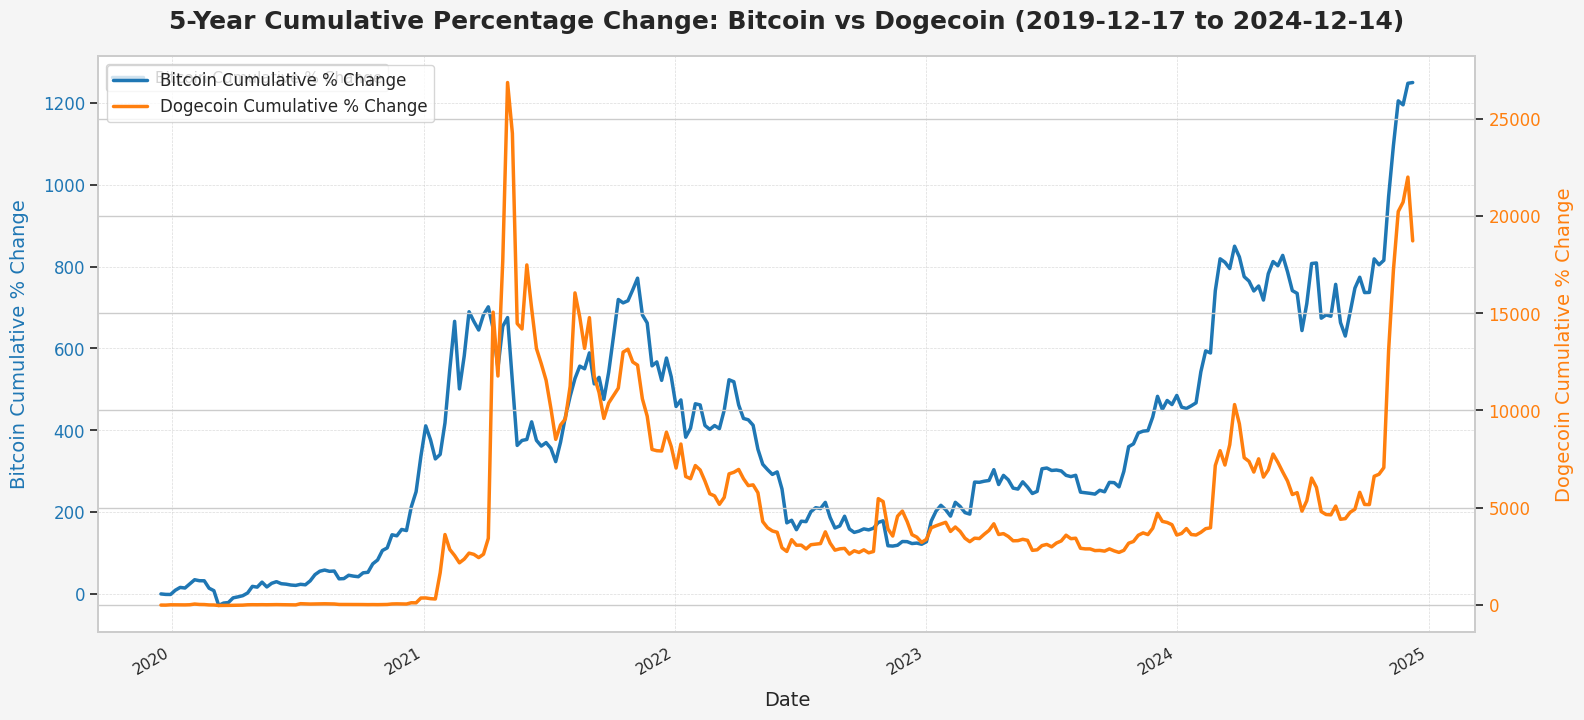

Dual-axis chart plotted successfully.
Comprehensive Crypto Analysis Completed Successfully.

Script finished with exit code 0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import logging
import sys
from typing import List, Tuple
import yfinance as yf

# Configure logging
logging.basicConfig(
    level=logging.INFO,  # Set to DEBUG for more detailed logs if needed
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[logging.StreamHandler(sys.stdout)]
)

def calculate_cumulative_percentage_change(df: pd.DataFrame, column: str) -> pd.Series:
    """
    Calculate the cumulative percentage change from the first entry for a given column.

    Cumulative Percentage Change:
    Measures the total percentage change of a value from its starting point to each subsequent point in time.

    Args:
        df (pd.DataFrame): DataFrame containing price data.
        column (str): The column name for which to calculate the percentage change.

    Returns:
        pd.Series: Series containing the cumulative percentage changes.
    """
    try:
        print(f"Calculating cumulative percentage change for {column}...")
        logging.info(f"Calculating cumulative percentage change for {column}.")
        start_price = df[column].iloc[0]
        if pd.isna(start_price) or start_price == 0:
            raise ValueError(f"Invalid start price for {column}. Cannot compute cumulative percentage change.")
        percent_change = (df[column] / start_price - 1) * 100
        logging.debug(f"Calculated cumulative percentage change for {column}.")
        print(f"Cumulative percentage change calculation for {column} completed.")
        return percent_change
    except IndexError as ie:
        logging.error(f"Error calculating cumulative percentage change for {column}: {ie}")
        print(f"Error calculating cumulative percentage change for {column}: {ie}")
        raise
    except Exception as e:
        logging.error(f"Unexpected error in cumulative percentage change calculation for {column}: {e}")
        print(f"Unexpected error in cumulative percentage change calculation for {column}: {e}")
        raise

def plot_dual_axis(df: pd.DataFrame, coins: List[Tuple[str, str]], start_date: str, end_date: str):
    """
    Plot a dual-axis chart for the given cryptocurrencies showing cumulative percentage changes with enhanced aesthetics.

    Args:
        df (pd.DataFrame): DataFrame containing cumulative percentage changes.
        coins (List[Tuple[str, str]]): List of tuples containing cryptocurrency names and their corresponding colors.
        start_date (str): Start date of the analysis period.
        end_date (str): End date of the analysis period.
    """
    try:
        print("Starting to plot the dual-axis chart...")
        logging.info("Starting to plot the dual-axis chart.")

        # Set Seaborn style for better aesthetics
        sns.set(style="whitegrid")

        fig, ax1 = plt.subplots(figsize=(16, 8), dpi=100)

        # Plot the first cryptocurrency on the primary y-axis
        color1 = coins[0][1]
        ax1.set_xlabel('Date', fontsize=14, labelpad=10)
        ax1.set_ylabel(f"{coins[0][0]} Cumulative % Change", color=color1, fontsize=14, labelpad=10)
        sns.lineplot(data=df, x=df.index, y=f"{coins[0][0]}_%", ax=ax1, color=color1, label=f"{coins[0][0]} Cumulative % Change", linewidth=2.5)
        ax1.tick_params(axis='y', labelcolor=color1, labelsize=12)

        # Plot the second cryptocurrency on the secondary y-axis
        ax2 = ax1.twinx()
        color2 = coins[1][1]
        ax2.set_ylabel(f"{coins[1][0]} Cumulative % Change", color=color2, fontsize=14, labelpad=10)
        sns.lineplot(data=df, x=df.index, y=f"{coins[1][0]}_%", ax=ax2, color=color2, label=f"{coins[1][0]} Cumulative % Change", linewidth=2.5)
        ax2.tick_params(axis='y', labelcolor=color2, labelsize=12)

        # Title with bold font emphasizing it's a cumulative chart
        plt.title(f'5-Year Cumulative Percentage Change: {coins[0][0]} vs {coins[1][0]} ({start_date} to {end_date})', fontsize=18, fontweight='bold', pad=20)

        # Combine legends from both axes for clarity
        lines_1, labels_1 = ax1.get_legend_handles_labels()
        lines_2, labels_2 = ax2.get_legend_handles_labels()
        plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=12)

        # Customize grid lines for better readability
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

        # Improve layout to prevent overlap
        fig.tight_layout()

        # Enhance x-axis date formatting for better visibility
        plt.gcf().autofmt_xdate()

        # Add background colors for aesthetics
        fig.patch.set_facecolor('#f5f5f5')  # Light gray background
        ax1.set_facecolor('#ffffff')        # White plot area

        plt.show()
        logging.info("Successfully plotted the dual-axis chart.")
        print("Dual-axis chart plotted successfully.")
    except Exception as e:
        logging.error(f"Error during plotting: {e}")
        print(f"Error during plotting: {e}")
        raise

def fetch_crypto_data_yahoo(ticker: str, start_date: str, end_date: str, interval: str = "1wk") -> pd.DataFrame:
    """
    Fetch historical cryptocurrency price data from Yahoo Finance.

    Args:
        ticker (str): The Yahoo Finance ticker symbol (e.g., 'BTC-USD').
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.
        interval (str): Data interval (e.g., '1d', '1wk', '1mo').

    Returns:
        pd.DataFrame: DataFrame containing Date as index and OHLC data.
    """
    try:
        print(f"Fetching data for {ticker} from Yahoo Finance...")
        logging.info(f"Fetching data for {ticker} from Yahoo Finance...")
        df = yf.download(ticker, start=start_date, end=end_date, interval=interval)
        if df.empty:
            raise ValueError(f"No price data found for {ticker} between {start_date} and {end_date}.")

        # Set 'Price' column to Close to maintain consistency
        df['Price'] = df['Close']
        print(f"Data fetch for {ticker} completed successfully.\n")
        logging.info(f"Successfully fetched data for {ticker}.")
        return df
    except Exception as e:
        logging.error(f"Error fetching data for {ticker}: {e}")
        print(f"Error fetching data for {ticker}: {e}")
        raise

def main() -> int:
    """
    Main function to execute the script.
    Returns:
        int: 0 on success, nonzero on error.
    """
    try:
        print("Starting Comprehensive Crypto Analysis...")
        logging.info("Script started.")

        # Define date range: Last five years from today, capping 'to' at yesterday
        today = datetime.today()
        five_years_ago = today - timedelta(days=5*365)  # Approximate 5 years
        yesterday = today - timedelta(days=1)
        start_date_str = five_years_ago.strftime("%Y-%m-%d")
        end_date_str = yesterday.strftime("%Y-%m-%d")
        logging.info(f"Date Range: {start_date_str} to {end_date_str}")
        print(f"Date range set from {start_date_str} to {end_date_str}.\n")

        # Mapping from your coin_id to Yahoo tickers
        yahoo_tickers = {
            'bitcoin': 'BTC-USD',
            'dogecoin': 'DOGE-USD'
        }

        # Define cryptocurrencies to fetch (Name, CoinGecko ID, Color)
        cryptocurrencies = [
            ('Bitcoin', 'bitcoin', '#1f77b4'),    # Blue
            ('Dogecoin', 'dogecoin', '#ff7f0e')   # Orange
        ]

        data_frames = {}

        # Fetch data for each cryptocurrency using Yahoo Finance
        for name, coin_id, color in cryptocurrencies:
            ticker = yahoo_tickers.get(coin_id)
            if not ticker:
                logging.error(f"No Yahoo Finance ticker found for {coin_id}. Skipping {name}.")
                print(f"No Yahoo Finance ticker found for {coin_id}. Skipping {name}.")
                continue
            try:
                df = fetch_crypto_data_yahoo(ticker, start_date_str, end_date_str, interval='1wk')
                data_frames[name] = df
            except Exception as e:
                logging.critical(f"Failure in fetching data for {name}: {e}")
                print(f"Failure in fetching data for {name}: {e}")
                continue  # Proceed with other cryptocurrencies

        if not data_frames:
            logging.critical("No data fetched for any cryptocurrency. Exiting.")
            print("No data fetched for any cryptocurrency. Exiting.")
            return 1
        else:
            print("Data fetched successfully for the following cryptocurrencies:")
            for name in data_frames.keys():
                print(f"- {name}")
            print("\n")
            logging.info("Data fetched successfully for all specified cryptocurrencies.")

        # Align the data by date
        try:
            print("Aligning data by date...")
            logging.info("Aligning data by date.")
            combined_df = pd.concat([df['Price'] for df in data_frames.values()], axis=1, join='inner')
            combined_df.columns = [name for name, _, _ in cryptocurrencies]
            logging.info("Successfully aligned data by date.")
            print("Data alignment completed successfully.\n")

            # **Print Combined Price DataFrame**
            print("Combined Price DataFrame:")
            print(combined_df.head())  # Prints first 5 rows
            print("\n")
        except Exception as e:
            logging.error(f"Error aligning data: {e}")
            print(f"Error aligning data: {e}")
            return 1

        if combined_df.empty:
            logging.critical("Combined DataFrame is empty after alignment. Exiting script.")
            print("Combined DataFrame is empty after alignment. Exiting script.")
            return 1

        # Calculate Cumulative Percentage Change
        try:
            print("Calculating cumulative percentage changes for all cryptocurrencies...")
            logging.info("Calculating cumulative percentage changes.")
            for name in data_frames.keys():
                combined_df[f"{name}_%"] = calculate_cumulative_percentage_change(combined_df, name)
            logging.info("Successfully calculated cumulative percentage changes.")
            print("Cumulative percentage changes calculated successfully.\n")

            # **Print Cumulative Percentage Change DataFrame**
            percent_cols = [f"{name}_%" for name in data_frames.keys()]
            percent_df = combined_df[percent_cols]
            print("Cumulative Percentage Change DataFrame:")
            print(percent_df.head())  # Prints first 5 rows
            print("\n")
        except Exception as e:
            logging.error(f"Error calculating cumulative percentage changes: {e}")
            print(f"Error calculating cumulative percentage changes: {e}")
            return 1

        # Extract cumulative percentage change columns
        percent_cols = [f"{name}_%" for name in data_frames.keys()]
        percent_df = combined_df[percent_cols]

        # Handle NaN values (the first entry will be 0% since it's the starting point)
        if percent_df.isnull().values.any():
            print("Cumulative percentage change data contains NaN values. Dropping them...")
            logging.warning("Cumulative percentage change data contains NaN values. Dropping them.")
            percent_df = percent_df.dropna()
            if percent_df.empty:
                logging.critical("All cumulative percentage change data is NaN after dropping. Exiting.")
                print("All cumulative percentage change data is NaN after dropping. Exiting.")
                return 1
            else:
                print("NaN values dropped successfully.\n")
                logging.info("NaN values dropped successfully from cumulative percentage change data.")
        else:
            print("No NaN values found in cumulative percentage change data.\n")

        # Plotting the dual-axis chart
        try:
            print("Preparing to plot the dual-axis chart...")
            logging.info("Preparing to plot the dual-axis chart.")
            coin_plot_info = [(name, color) for name, _, color in cryptocurrencies]
            plot_dual_axis(percent_df, coin_plot_info, start_date_str, end_date_str)
        except Exception as e:
            logging.critical(f"Plotting failure: {e}")
            print(f"Plotting failure: {e}")
            return 1

        logging.info("Script completed successfully.")
        print("Comprehensive Crypto Analysis Completed Successfully.\n")
        return 0
    except Exception as e:
        # Catch any unexpected exceptions in main
        logging.critical(f"Unhandled exception in main: {e}")
        print(f"Unhandled exception in main: {e}")
        return 1

# Execute the main function directly. No try-except at the top-level.
exit_code = main()
print(f"Script finished with exit code {exit_code}")


# Regression, Correlation, etc

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Starting Comprehensive Crypto Analysis...
Date range set from 2014-12-18 to 2024-12-14.

Starting data fetch for BTC-USD from 2014-12-18 to 2024-12-14 with interval 1wk...
Data fetch for BTC-USD completed successfully.

Starting data fetch for DOGE-USD from 2014-12-18 to 2024-12-14 with interval 1wk...
Data fetch for DOGE-USD completed successfully.

Calculating weekly returns for all cryptocurrencies...
Week-over-week returns calculation for Price completed.
Week-over-week returns calculation for Price completed.
Weekly returns calculated successfully.

Dropping NaN values from returns data...
NaN values dropped from returns data.

Checking for stationarity of the return series...
ADF Test: Statistic=-17.1111, p-value=0.0000
Result: The series is stationary.

ADF Test: Statistic=-3.9321, p-value=0.0018
Result: The series is stationary.

Calculating correlation between Bitcoin and Dogecoin returns...
Pearson Correlation Coefficient between Bitcoin and Dogecoin: 0.3485

Performing multi

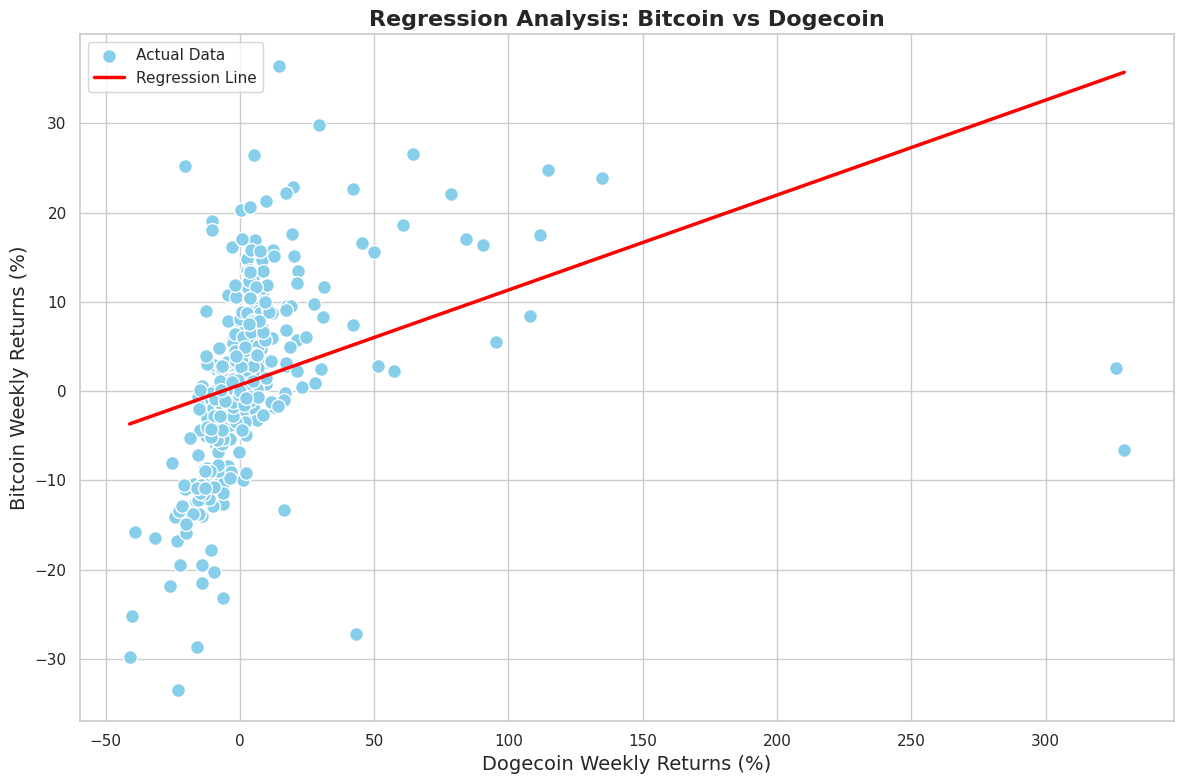

Regression chart plotted successfully.

Calculating and plotting rolling correlation...
--- DATAFRAME FOR ROLLING CORRELATION (CLEANED) ---
            Rolling_52_Week_Corr
Date                            
2018-11-19              0.555234
2018-11-26              0.563124
2018-12-03              0.592939
2018-12-10              0.542069
2018-12-17              0.645070
2018-12-24              0.645012
2018-12-31              0.630606
2019-01-07              0.619779
2019-01-14              0.606017
2019-01-21              0.605023
2019-01-28              0.571147
2019-02-04              0.572394
2019-02-11              0.551444
2019-02-18              0.550197
2019-02-25              0.594347
2019-03-04              0.580579
2019-03-11              0.567654
2019-03-18              0.565690
2019-03-25              0.550356
2019-04-01              0.618311


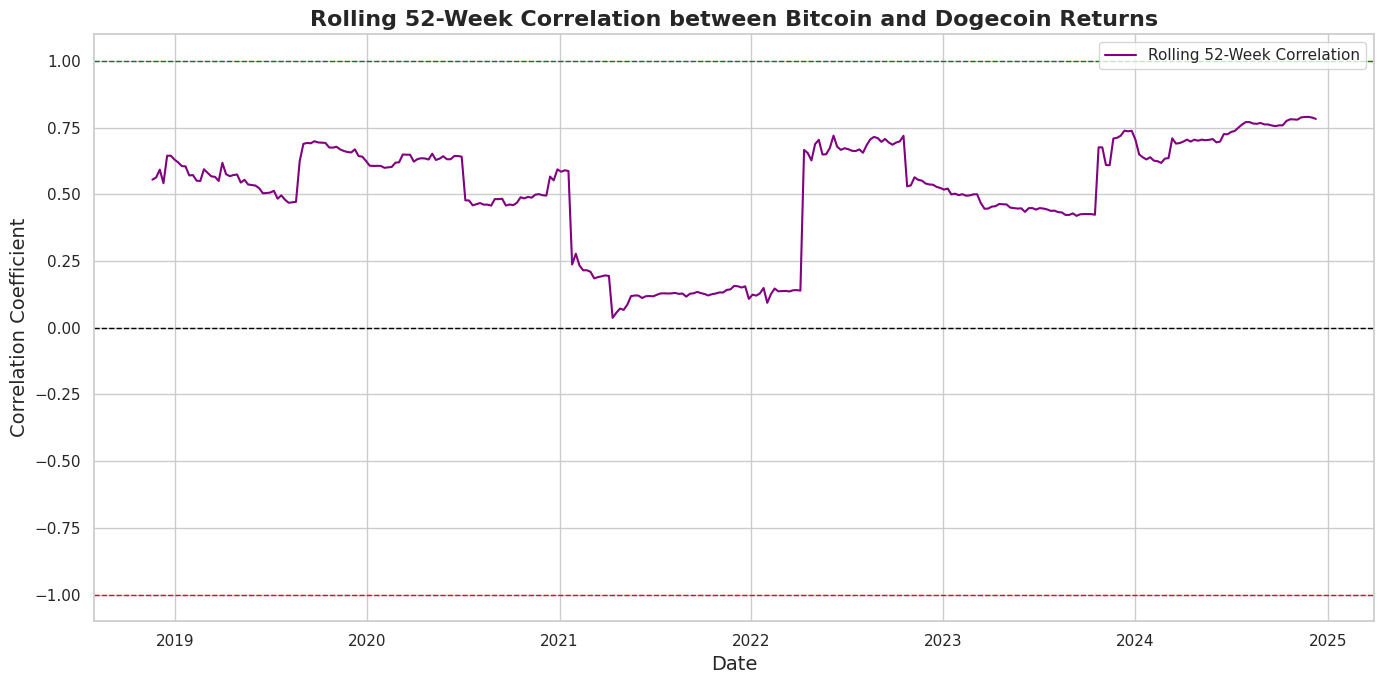

Rolling correlation chart plotted successfully.


--- Starting Moving Averages Calculation for Bitcoin ---
Checking for 'Price' column in DataFrame...
'Price' column found in DataFrame.

'Price' column statistics for Bitcoin:
count       522.000000
mean      19786.893359
std       21780.503829
min         210.339005
25%        2513.467529
50%        9616.714844
75%       31673.886230
max      101372.968750
Name: Price, dtype: float64

Defined moving average columns: 'Bitcoin_MA50' and 'Bitcoin_MA200'.

Checking if DataFrame has at least 200 data points for moving averages...
DataFrame has sufficient data (522 weeks) for moving averages.

Calculating 50-week moving average...
50-week moving average 'Bitcoin_MA50' calculated.

Calculating 200-week moving average...
200-week moving average 'Bitcoin_MA200' calculated.

Dropping rows with NaN values in moving average columns...
Skipping moving averages plot for Bitcoin due to encountered errors.
Calculating and plotting 52-week rolling vola

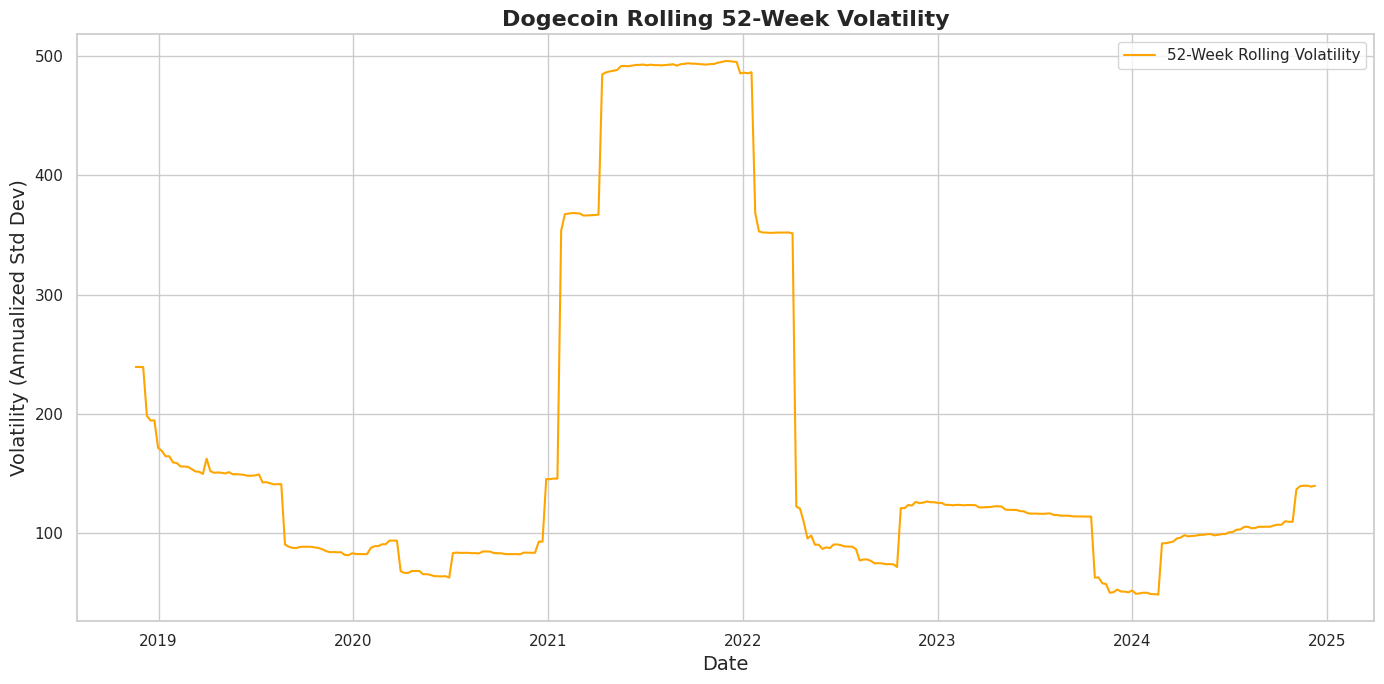

Volatility chart plotted successfully.

Performing cointegration test between Bitcoin and Dogecoin...
Result: The series Bitcoin and Dogecoin are cointegrated.

Cointegration test completed.

Performing Granger causality tests with maxlag=4...
Testing if Dogecoin Granger-causes Bitcoin...
Result: Dogecoin Granger-causes Bitcoin. (min p-value: 0.0008)
Testing if Bitcoin Granger-causes Dogecoin...
Result: Bitcoin does not Granger-cause Dogecoin. (min p-value: 0.3503)
Granger causality tests completed.

Comprehensive Crypto Analysis Completed Successfully.

Script finished successfully.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
import logging
import sys
from typing import List, Tuple
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests, coint, adfuller

# Configure logging
logging.basicConfig(
    level=logging.INFO,  # Set to DEBUG for more detailed logs if needed
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[logging.StreamHandler(sys.stdout)]
)

def fetch_crypto_data_yahoo(ticker: str, start_date: str, end_date: str, interval: str = "1wk") -> pd.DataFrame:
    print(f"Starting data fetch for {ticker} from {start_date} to {end_date} with interval {interval}...")
    logging.info(f"Fetching data for {ticker} from Yahoo Finance...")
    try:
        df = yf.download(ticker, start=start_date, end=end_date, interval=interval)
        if df.empty:
            raise ValueError(f"No price data found for {ticker} between {start_date} and {end_date}.")

        if 'Close' not in df.columns:
            raise ValueError(f"'Close' column not found in the fetched data for {ticker}.")

        df['Price'] = df['Close']
        logging.info(f"Successfully fetched data for {ticker}.")
        print(f"Data fetch for {ticker} completed successfully.\n")
        return df
    except Exception as e:
        logging.error(f"Error fetching data for {ticker}: {e}")
        print(f"Error fetching data for {ticker}: {e}")
        raise

def calculate_period_over_period_returns(df: pd.DataFrame, column: str) -> pd.Series:
    """
    Calculate the week-over-week percentage change for a given column, without forward-filling by pct_change.
    """
    logging.info(f"Calculating week-over-week percentage change for {column}.")
    try:
        # Use fill_method=None to avoid the deprecation warning and unintended forward fill
        returns = df[column].pct_change(fill_method=None) * 100
        returns = returns.dropna()  # Drop the first NaN (from the first period which has no previous data)
        logging.debug(f"Week-over-week returns for {column} calculated.")
        print(f"Week-over-week returns calculation for {column} completed.")
        return returns
    except Exception as e:
        logging.error(f"Error calculating returns for {column}: {e}")
        print(f"Error calculating returns for {column}: {e}")
        raise

def check_stationarity(series: pd.Series, significance_level: float = 0.05) -> bool:
    """
    Perform Augmented Dickey-Fuller test to check stationarity.
    """
    logging.info("Performing Augmented Dickey-Fuller test for stationarity.")
    result = adfuller(series)
    p_value = result[1]
    logging.info(f"ADF Statistic: {result[0]:.4f}, p-value: {p_value:.4f}")
    print(f"ADF Test: Statistic={result[0]:.4f}, p-value={p_value:.4f}")
    if p_value < significance_level:
        logging.info("Series is stationary.")
        print("Result: The series is stationary.\n")
        return True
    else:
        logging.info("Series is non-stationary.")
        print("Result: The series is non-stationary.\n")
        return False

def perform_regression_analysis(df: pd.DataFrame, independent_vars: List[str], dependent_var: str):
    """
    Perform multiple linear regression analysis.
    """
    independent_df = df[independent_vars]
    dependent = df[dependent_var]

    # Add constant term
    X = sm.add_constant(independent_df)
    Y = dependent

    # Fit the regression model
    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X)

    logging.info(f"Regression Analysis completed with independent variables: {independent_vars}")
    print("Regression analysis completed successfully.\n")
    print(model.summary())
    return model, predictions

def plot_regression(df: pd.DataFrame, independent_vars: List[str], dependent_var: str, model, x_var='Dogecoin'):
    print("Plotting regression analysis chart...")
    logging.info("Plotting regression analysis.")
    try:
        # Check that x_var is indeed one of the independent variables
        if x_var not in independent_vars:
            raise ValueError(f"{x_var} is not in the list of independent variables.")

        sns.set(style="whitegrid")
        plt.figure(figsize=(12, 8), dpi=100)

        # Scatter plot of the actual data
        plt.scatter(df[x_var], df[dependent_var], color='skyblue', edgecolor='w', s=100, label='Actual Data')

        # Extract model exogenous names (this includes 'const' and all independent variables)
        expected_cols = model.model.exog_names  # Typically ['const', 'Dogecoin', 'Dogecoin_Returns_Lag1', 'Dogecoin_Returns_Lag2', ...]

        # Create a DataFrame for prediction
        # Generate a sequence of x values for x_var
        x_values = np.linspace(df[x_var].min(), df[x_var].max(), 100)
        pred_df = pd.DataFrame({x_var: x_values})

        # Add the other independent variables at their mean values
        for var in independent_vars:
            if var != x_var:
                # Use the mean from the original df to hold them constant
                mean_val = df[var].mean()
                pred_df[var] = mean_val

        # Manually add the constant column
        pred_df['const'] = 1.0

        # Now we must ensure pred_df has exactly the columns in the same order as the model expects
        # Check for missing columns (other than 'const') that the model expects
        missing_cols = [col for col in expected_cols if col not in pred_df.columns]
        if missing_cols:
            raise ValueError(f"Missing columns in pred_X: {missing_cols}. Ensure these columns are present.")

        # Reorder pred_df to match the model's training columns
        pred_df = pred_df[expected_cols]

        # Predict using the model
        predicted_y = model.predict(pred_df)

        # Plot the regression line
        plt.plot(x_values, predicted_y, color='red', label='Regression Line', linewidth=2.5)

        plt.title(f'Regression Analysis: {dependent_var} vs {x_var}', fontsize=16, fontweight='bold')
        plt.xlabel(f'{x_var} Weekly Returns (%)', fontsize=14)
        plt.ylabel(f'{dependent_var} Weekly Returns (%)', fontsize=14)
        plt.legend()
        plt.tight_layout()
        plt.show()

        logging.info("Regression plot completed.")
        print("Regression chart plotted successfully.\n")

    except Exception as e:
        logging.error(f"Error during plotting regression analysis: {e}")
        print(f"Error during plotting regression analysis: {e}")
        raise

def plot_rolling_correlation(returns_df: pd.DataFrame, window: int = 52):
    """
    Plot the rolling correlation between Bitcoin and Dogecoin returns.
    """
    print("Calculating and plotting rolling correlation...")
    logging.info(f"Calculating {window}-week rolling correlation...")
    try:
        rolling_corr = returns_df['Bitcoin'].rolling(window=window).corr(returns_df['Dogecoin'])
        rolling_corr = rolling_corr.dropna()

        rolling_corr_df = pd.DataFrame({'Date': rolling_corr.index, 'Rolling_52_Week_Corr': rolling_corr.values}).set_index('Date')
        print("--- DATAFRAME FOR ROLLING CORRELATION (CLEANED) ---")
        print(rolling_corr_df.head(20))

        sns.set(style="whitegrid")
        plt.figure(figsize=(14, 7), dpi=100)
        sns.lineplot(data=rolling_corr, color='purple', label=f'Rolling {window}-Week Correlation')

        plt.title(f'Rolling {window}-Week Correlation between Bitcoin and Dogecoin Returns', fontsize=16, fontweight='bold')
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Correlation Coefficient', fontsize=14)
        plt.legend()
        plt.axhline(0, color='black', linestyle='--', linewidth=1)
        plt.axhline(1, color='green', linestyle='--', linewidth=1)
        plt.axhline(-1, color='red', linestyle='--', linewidth=1)
        plt.tight_layout()
        plt.show()

        logging.info("Rolling correlation plot completed.")
        print("Rolling correlation chart plotted successfully.\n")
    except Exception as e:
        logging.error(f"Error during plotting rolling correlation: {e}")
        print(f"Error during plotting rolling correlation: {e}")
        raise

def plot_moving_averages(df: pd.DataFrame, coin: str, short_window: int = 50, long_window: int = 200):
    """
    Plot moving averages for a given cryptocurrency.
    If the long_window can't be plotted due to insufficient data, try reducing the window or adjusting the date range.
    """
    print(f"\n--- Starting Moving Averages Calculation for {coin} ---")
    logging.info(f"Calculating {short_window}-week and {long_window}-week moving averages for {coin}.")

    try:
        # 1. Ensure 'Price' column exists
        print("Checking for 'Price' column in DataFrame...")
        if 'Price' not in df.columns:
            print("'Price' column not found. Attempting to create it from 'Close' column...")
            if 'Close' in df.columns:
                df['Price'] = df['Close']
                print("'Price' column successfully created from 'Close'.")
                logging.info(f"'Price' column created from 'Close' for {coin}.")
            else:
                error_msg = (
                    f"Error: The DataFrame for {coin} does not contain a 'Price' or 'Close' column "
                    f"required for computing moving averages."
                )
                print(error_msg)
                logging.error(error_msg)
                raise ValueError(error_msg)
        else:
            print("'Price' column found in DataFrame.")

        # 2. Display 'Price' statistics
        print(f"\n'Price' column statistics for {coin}:")
        print(df['Price'].describe())

        # 3. Define moving average column names
        short_ma_col = f'{coin}_MA{short_window}'
        long_ma_col = f'{coin}_MA{long_window}'
        print(f"\nDefined moving average columns: '{short_ma_col}' and '{long_ma_col}'.")

        # 4. Check if enough data for the long-term MA
        print(f"\nChecking if DataFrame has at least {long_window} data points for moving averages...")
        if len(df) < long_window:
            # Try a shorter long_window if original fails
            new_long_window = 100
            logging.warning(
                f"Insufficient data for {long_window}-week MA for {coin}. "
                f"Attempting shorter long window of {new_long_window} weeks."
            )
            if len(df) < new_long_window:
                error_msg = (
                    f"Error: Insufficient data to compute even {new_long_window}-week MA for {coin}. "
                    f"Need at least {new_long_window} weeks, but only {len(df)} weeks available."
                )
                logging.error(error_msg)
                print(error_msg)
                # Skip plotting this coin's MAs entirely
                print(f"Skipping moving averages plot for {coin} due to insufficient data.")
                return  # Return gracefully without raising

            # Update long_window if shorter window works
            long_window = new_long_window
            long_ma_col = f'{coin}_MA{long_window}'
            print(f"DataFrame doesn't have {long_window} data points. Using {long_window}-week MA instead.")
        else:
            print(f"DataFrame has sufficient data ({len(df)} weeks) for moving averages.")

        # 5. Compute the short and long moving averages
        print(f"\nCalculating {short_window}-week moving average...")
        df[short_ma_col] = df['Price'].rolling(window=short_window, min_periods=short_window).mean()
        print(f"{short_window}-week moving average '{short_ma_col}' calculated.")

        print(f"\nCalculating {long_window}-week moving average...")
        df[long_ma_col] = df['Price'].rolling(window=long_window, min_periods=long_window).mean()
        print(f"{long_window}-week moving average '{long_ma_col}' calculated.")

        # 6. Verify that the moving average columns exist
        for col in [short_ma_col, long_ma_col]:
            if col not in df.columns:
                error_msg = (
                    f"Error: Column '{col}' was not created after computing moving averages for {coin}. "
                    "Check that there is sufficient data and that rolling calculations succeeded."
                )
                print(error_msg)
                logging.error(error_msg)
                # Skip plotting this coin's MAs entirely
                print(f"Skipping moving averages plot for {coin}.")
                return

        # 7. Drop rows with NaNs in the moving averages
        print("\nDropping rows with NaN values in moving average columns...")
        rows_before = len(df)
        df_clean = df.dropna(subset=[short_ma_col, long_ma_col])
        rows_after = len(df_clean)
        print(f"Rows before dropping NaNs: {rows_before}")
        print(f"Rows after dropping NaNs: {rows_after}")

        if df_clean.empty:
            logging.warning(
                f"After attempting to compute MAs for {coin}, no valid data remains. "
                "Attempting to adjust the display period."
            )
            # Attempt to adjust the display period by reducing it
            # For example, start plotting from where long MA is first computed
            df_clean = df.copy()
            df_clean = df_clean[df_clean[long_ma_col].notna()]

            if df_clean.empty:
                # Still empty, skip plotting
                logging.warning(f"Even after adjusting the display period, no valid data for {coin}. Skipping plot.")
                print(f"Skipping moving averages plot for {coin}.")
                return
            else:
                print("Adjusted the display period to start where long MA is available.")

        # 8. Verify the required columns exist in df_clean before printing
        required_columns = ['Price', short_ma_col, long_ma_col]
        for c in required_columns:
            if c not in df_clean.columns:
                logging.warning(
                    f"Column '{c}' missing in cleaned DataFrame for {coin}, skipping the MA plot."
                )
                print(f"Skipping moving averages plot for {coin}.")
                return

        # 9. Print a preview of the cleaned DataFrame
        print("\n--- DATAFRAME FOR MOVING AVERAGES (CLEANED) ---")
        print(df_clean[required_columns].head(20))

        if df_clean.empty:
            logging.warning(f"After all adjustments, no data to plot for {coin}'s moving averages.")
            print(f"Skipping moving averages plot for {coin}.")
            return

        # 10. Plotting the moving averages
        print(f"\nPlotting moving averages for {coin}...")
        sns.set(style="whitegrid")
        plt.figure(figsize=(16, 8), dpi=100)

        # Plot the Price and moving averages using index and Series directly
        print(f"Plotting {coin} Price...")
        sns.lineplot(x=df_clean.index, y=df_clean['Price'], label=f'{coin} Price', color='blue', linewidth=2)

        print(f"Plotting {short_window}-Week MA ({short_ma_col})...")
        sns.lineplot(x=df_clean.index, y=df_clean[short_ma_col], label=f'{short_window}-Week MA', color='red', linewidth=1.5)

        print(f"Plotting {long_window}-Week MA ({long_ma_col})...")
        sns.lineplot(x=df_clean.index, y=df_clean[long_ma_col], label=f'{long_window}-Week MA', color='green', linewidth=1.5)

        # Finalize the plot
        plt.title(f'{coin} Price with {short_window}-Week and {long_window}-Week Moving Averages', fontsize=16, fontweight='bold')
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Price (USD)', fontsize=14)
        plt.legend()
        plt.tight_layout()

        try:
            plt.show()
            print("Plot displayed successfully.")
        except Exception as show_e:
            error_msg = (
                f"An error occurred while displaying the plot for {coin}. "
                f"Original error: {str(show_e)}"
            )
            print(error_msg)
            logging.error(error_msg)

        logging.info("Moving averages chart plotted successfully.")
        print("Moving averages chart plotted successfully.\n")

    except Exception as e:
        logging.warning(f"Moving averages analysis for {coin} encountered an issue: {str(e)}")
        print(f"Skipping moving averages plot for {coin} due to encountered errors.")
        return

def plot_volatility(returns_df: pd.DataFrame, coin: str, window: int = 52):
    """
    Plot the rolling volatility of a cryptocurrency's returns.
    """
    print(f"Calculating and plotting {window}-week rolling volatility for {coin}...")
    logging.info(f"Calculating {window}-week rolling volatility for {coin}.")
    try:
        volatility = returns_df[coin].rolling(window=window).std() * (52 ** 0.5)
        volatility = volatility.dropna()

        volatility_df = pd.DataFrame({'Date': volatility.index, f'{coin}_Rolling_{window}_Week_Volatility': volatility.values}).set_index('Date')
        print("\n--- DATAFRAME FOR VOLATILITY (CLEANED) ---")
        print(volatility_df.head(20))

        sns.set(style="whitegrid")
        plt.figure(figsize=(14, 7), dpi=100)
        sns.lineplot(data=volatility, color='orange', label=f'{window}-Week Rolling Volatility')

        plt.title(f'{coin} Rolling {window}-Week Volatility', fontsize=16, fontweight='bold')
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Volatility (Annualized Std Dev)', fontsize=14)
        plt.legend()
        plt.tight_layout()
        plt.show()

        logging.info("Volatility plot completed.")
        print("Volatility chart plotted successfully.\n")
    except Exception as e:
        logging.error(f"Error during plotting volatility for {coin}: {e}")
        print(f"Error during plotting volatility for {coin}: {e}")
        raise

def perform_cointegration_test(returns_df: pd.DataFrame, var1: str, var2: str):
    """
    Perform cointegration test between two variables.
    """
    print(f"Performing cointegration test between {var1} and {var2}...")
    logging.info(f"Performing cointegration test between {var1} and {var2}...")
    try:
        score, pvalue, _ = coint(returns_df[var1], returns_df[var2])
        logging.info(f"Cointegration Test between {var1} and {var2}: Test Statistic: {score:.4f}, P-Value: {pvalue:.4f}")
        if pvalue < 0.05:
            print(f"Result: The series {var1} and {var2} are cointegrated.\n")
        else:
            print(f"Result: The series {var1} and {var2} are not cointegrated.\n")
        print("Cointegration test completed.\n")
    except Exception as e:
        logging.error(f"Error during cointegration test between {var1} and {var2}: {e}")
        print(f"Error during cointegration test between {var1} and {var2}: {e}")
        raise

def perform_granger_causality_test(returns_df: pd.DataFrame, causality_pairs: List[Tuple[str, str]], maxlag: int = 4):
    """
    Perform Granger Causality Test between pairs of variables.
    """
    print(f"Performing Granger causality tests with maxlag={maxlag}...")
    logging.info("Performing Granger causality tests.")
    try:
        for cause, effect in causality_pairs:
            print(f"Testing if {cause} Granger-causes {effect}...")
            logging.info(f"Granger Causality Test: Does {cause} Granger-cause {effect}?")
            test_result = grangercausalitytests(returns_df[[effect, cause]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0]['ssr_ftest'][1],4) for i in range(maxlag)]
            min_p_value = min(p_values)
            logging.info(f"Minimum P-Value from {maxlag} lags: {min_p_value}")
            if min_p_value < 0.05:
                print(f"Result: {cause} Granger-causes {effect}. (min p-value: {min_p_value})")
            else:
                print(f"Result: {cause} does not Granger-cause {effect}. (min p-value: {min_p_value})")
        print("Granger causality tests completed.\n")
    except Exception as e:
        logging.error(f"Error during Granger Causality Test: {e}")
        print(f"Error during Granger Causality Test: {e}")
        raise

def check_and_transform_stationarity(returns_df: pd.DataFrame) -> pd.DataFrame:
    """
    Check stationarity and apply differencing if necessary.
    """
    print("Checking for stationarity of the return series...")
    logging.info("Checking for stationarity of the return series.")
    for column in returns_df.columns:
        is_stationary = check_stationarity(returns_df[column])
        if not is_stationary:
            print(f"Applying first-order differencing to {column} to achieve stationarity.")
            returns_df[column] = returns_df[column].diff().dropna()
            print(f"First-order differencing applied to {column}.\n")
    # After differencing, drop any remaining NaN values
    returns_df = returns_df.dropna()
    return returns_df

def main() -> int:
    print("Starting Comprehensive Crypto Analysis...")
    logging.info("Comprehensive Crypto Analysis Script Started.")

    try:
        # Define date range: Last ten years from today, capping 'to' at yesterday
        # This should be more than enough to cover a 200-week (nearly 4-year) MA.
        today = datetime.today()
        ten_years_ago = today - timedelta(days=10*365)  # Approx 10 years
        yesterday = today - timedelta(days=1)
        start_date_str = ten_years_ago.strftime("%Y-%m-%d")
        end_date_str = yesterday.strftime("%Y-%m-%d")
        logging.info(f"Date Range: {start_date_str} to {end_date_str}")
        print(f"Date range set from {start_date_str} to {end_date_str}.\n")

        cryptocurrencies = [
            ('Bitcoin', 'BTC-USD'),
            ('Dogecoin', 'DOGE-USD')
        ]

        data_frames = {}

        # Fetch data for each cryptocurrency without forward filling or frequency adjustments
        for name, ticker in cryptocurrencies:
            try:
                df = fetch_crypto_data_yahoo(ticker, start_date_str, end_date_str, interval='1wk')

                if df.empty:
                    raise ValueError(f"No data returned for {name} ({ticker}) from Yahoo Finance.")

                # Confirm we have 'Price' column (should have been created by fetch_crypto_data_yahoo)
                if 'Price' not in df.columns:
                    raise ValueError(f"Data for {name} does not contain a 'Price' column.")

                # Check if we have enough data points
                if len(df['Price'].dropna()) < 200:
                    # If we cannot compute a 200-week MA due to insufficient data, raise a warning
                    logging.warning(
                        f"{name} data might be insufficient for 200-week MA. Only {len(df)} data points fetched."
                    )

                data_frames[name] = df
            except Exception as e:
                logging.critical(f"Unable to fetch or prepare data for {name}: {e}")
                print(f"Unable to fetch or prepare data for {name}. Exiting.")
                return 1

        if not data_frames:
            logging.critical("No data fetched for any cryptocurrency. Exiting.")
            print("No data fetched. Exiting.")
            return 1

        # Calculate weekly returns
        print("Calculating weekly returns for all cryptocurrencies...")
        logging.info("Calculating weekly percentage returns...")
        returns_df = pd.DataFrame()
        try:
            for name, df in data_frames.items():
                returns_df[name] = calculate_period_over_period_returns(df, 'Price')
            logging.info("Successfully calculated weekly percentage returns.")
            print("Weekly returns calculated successfully.\n")
        except Exception as e:
            logging.error(f"Error calculating returns: {e}")
            print(f"Error calculating returns: {e}")
            return 1

        # Drop NaN values from returns_df
        logging.info("Dropping NaN values from returns data...")
        print("Dropping NaN values from returns data...")
        returns_df.dropna(inplace=True)

        if returns_df.empty:
            logging.critical("Returns DataFrame is empty after dropping NaN values. Exiting.")
            print("Returns DataFrame is empty after dropping NaN values. Exiting.")
            return 1
        print("NaN values dropped from returns data.\n")

        # Check and ensure stationarity
        returns_df = check_and_transform_stationarity(returns_df)

        if returns_df.empty:
            logging.critical("Returns DataFrame is empty after stationarity transformations. Exiting.")
            print("Returns DataFrame is empty after stationarity transformations. Exiting.")
            return 1

        # Calculate Pearson correlation coefficient
        logging.info("Calculating Pearson correlation coefficient between Bitcoin and Dogecoin returns...")
        print("Calculating correlation between Bitcoin and Dogecoin returns...")
        try:
            correlation = returns_df['Bitcoin'].corr(returns_df['Dogecoin'])
            logging.info(f"Pearson Correlation Coefficient: {correlation:.4f}")
            print(f"Pearson Correlation Coefficient between Bitcoin and Dogecoin: {correlation:.4f}\n")
        except Exception as e:
            logging.error(f"Error calculating correlation: {e}")
            print(f"Error calculating correlation: {e}")
            return 1

        # Perform multiple linear regression with lagged variables
        print("Performing multiple linear regression analysis between Bitcoin and Dogecoin returns with lagged variables...")
        try:
            # Create lagged variables
            returns_df['Dogecoin_Returns_Lag1'] = returns_df['Dogecoin'].shift(1)
            returns_df['Dogecoin_Returns_Lag2'] = returns_df['Dogecoin'].shift(2)
            returns_df = returns_df.dropna()  # Drop rows with NaN due to lagging

            independent_vars = ['Dogecoin', 'Dogecoin_Returns_Lag1', 'Dogecoin_Returns_Lag2']
            dependent_var = 'Bitcoin'

            if returns_df.empty:
                raise ValueError("No data available after creating lagged variables for regression.")

            model, predictions = perform_regression_analysis(returns_df, independent_vars, dependent_var)

            regression_df = pd.DataFrame({
                'Bitcoin_Returns': returns_df['Bitcoin'],
                'Dogecoin_Returns': returns_df['Dogecoin'],
                'Dogecoin_Returns_Lag1': returns_df['Dogecoin_Returns_Lag1'],
                'Dogecoin_Returns_Lag2': returns_df['Dogecoin_Returns_Lag2'],
                'Predicted_Bitcoin_Returns': predictions
            })
            print("--- DATAFRAME FOR REGRESSION ANALYSIS (CLEANED) ---")
            print(regression_df.head(20), "\n")
        except Exception as e:
            logging.error(f"Regression analysis failed: {e}")
            print(f"Regression analysis failed: {e}")
            return 1

        # Plot regression analysis
        try:
            plot_regression(returns_df, independent_vars, dependent_var, model)
        except Exception as e:
            logging.error(f"Plotting regression analysis failed: {e}")
            print(f"Plotting regression analysis failed: {e}")
            return 1

        # Rolling Correlation
        try:
            plot_rolling_correlation(returns_df, window=52)
        except Exception as e:
            logging.error(f"Rolling correlation analysis failed: {e}")
            print(f"Rolling correlation analysis failed: {e}")
            return 1

        # Moving Averages (Bitcoin)
        try:
            plot_moving_averages(data_frames['Bitcoin'].copy(), 'Bitcoin', short_window=50, long_window=200)
        except Exception as e:
            logging.error(f"Moving averages analysis for Bitcoin failed: {e}")
            print(f"Moving averages analysis for Bitcoin failed: {e}")
            return 1

        # Volatility (Dogecoin)
        try:
            plot_volatility(returns_df, 'Dogecoin', window=52)
        except Exception as e:
            logging.error(f"Volatility analysis for Dogecoin failed: {e}")
            print(f"Volatility analysis for Dogecoin failed: {e}")
            return 1

        # Cointegration Test
        try:
            perform_cointegration_test(returns_df, 'Bitcoin', 'Dogecoin')
        except Exception as e:
            logging.error(f"Cointegration test failed: {e}")
            print(f"Cointegration test failed: {e}")
            return 1

        # Granger Causality Test
        try:
            causality_pairs = [('Dogecoin', 'Bitcoin'), ('Bitcoin', 'Dogecoin')]
            perform_granger_causality_test(returns_df, causality_pairs, maxlag=4)
        except Exception as e:
            logging.error(f"Granger causality test failed: {e}")
            print(f"Granger causality test failed: {e}")
            return 1

        logging.info("Comprehensive Crypto Analysis Script Completed Successfully.")
        print("Comprehensive Crypto Analysis Completed Successfully.\n")
        return 0
    except Exception as e:
        logging.critical(f"An unexpected error occurred in main: {e}")
        print(f"An unexpected error occurred: {e}")
        return 1

def main_wrapper():
    exit_code = main()
    if exit_code != 0:
        print(f"Script finished with exit code {exit_code}")
    else:
        print("Script finished successfully.")

# Execute the main function directly without using sys.exit()
main_wrapper()


---

## 2. Interpreting the Results for Bitcoin and Dogecoin

Delving into the analytical results offers a deeper understanding of the relationship and dynamics between Bitcoin and Dogecoin.

### **Stationarity Tests**

- **Outcome:**  
  Both Bitcoin and Dogecoin weekly returns are **stationary** (p-values < 0.05 in the Augmented Dickey-Fuller tests).

- **Implication:**  
  Stationarity is critical for many time-series models as it implies that statistical properties (mean, variance) do not change over time. This makes the series more predictable and suitable for analysis.

### **Correlation (Pearson = 0.3485)**

- **Interpretation:**  
  The returns of Bitcoin and Dogecoin exhibit a **moderate positive correlation** of approximately **0.35**.

- **Meaning:**  
  When Dogecoin returns are positive, Bitcoin returns tend to be slightly more positive as well. However, the relationship is not strong or perfect, indicating other factors also influence Bitcoin's returns.

### **Regression Analysis**

- **Model Overview:**  
  A multiple linear regression model was employed with Bitcoin's returns as the dependent variable and Dogecoin's current and lagged returns as independent variables.

- **Key Findings:**
  - **R-squared (~0.132):**  
    About **13%** of Bitcoin's weekly return variation is explained by Dogecoin returns (current and lagged). While not high, it's notable in financial markets where numerous factors play a role.
  
  - **Coefficients:**
    - **Dogecoin (Current Return):**  
      Positive and significant, suggesting that positive Dogecoin returns are associated with mildly positive Bitcoin returns in the same week.
    
    - **Dogecoin_Returns_Lag2:**  
      Also significant, indicating that Dogecoin's returns two weeks prior have a delayed, albeit weaker, effect on Bitcoin’s returns.
    
    - **Dogecoin_Returns_Lag1:**  
      Not significant, implying no consistent one-week delayed relationship in this sample.

- **Overall Insight:**  
  Dogecoin returns have some explanatory power over Bitcoin returns, but the relationship is weak and not exhaustive.

### **Rolling Correlation (~0.55-0.65 in the Sample Shown)**

- **Interpretation:**  
  The 52-week rolling correlation between Bitcoin and Dogecoin returns often hovers around **0.55-0.65**, indicating a moderate positive relationship.

- **Dynamics:**  
  This correlation can fluctuate over time, reflecting changing market dynamics. Higher correlations might suggest that the assets are moving more in tandem, possibly due to shared market sentiment, while lower correlations indicate more independent movements.

### **Moving Averages Issue**

- **Challenge:**  
  Attempting to plot 50-week and 200-week moving averages for Bitcoin encountered issues such as missing data points after cleaning and large rolling windows leading to insufficient data for a continuous line.

- **Implication:**  
  Practical challenges like data gaps or handling very large rolling windows can complicate the visualization and analysis of long-term trends.

### **Volatility (Dogecoin)**

- **Observation:**  
  Dogecoin exhibits periods of **extremely high annualized volatility** (values above **150-200%**).

- **Significance:**  
  Such high volatility underscores the speculative and unpredictable nature of Dogecoin's price movements, which is common in the cryptocurrency market.

### **Cointegration Test**

- **Result:**  
  Bitcoin and Dogecoin are **cointegrated**.

- **Meaning:**  
  Cointegration suggests a **long-term equilibrium relationship** between their prices or returns, even if their short-term movements may drift apart. This indicates that the two assets are not moving entirely independently over the long run.

### **Granger Causality Tests**

- **Findings:**
  - **Dogecoin Granger-causes Bitcoin:**  
    Knowing Dogecoin’s returns can improve predictions of Bitcoin’s future returns.
  
  - **Bitcoin does not Granger-cause Dogecoin:**  
    Bitcoin’s returns do not enhance predictions of Dogecoin’s future returns.

- **Interpretation:**  
  This statistical result suggests a directional relationship where Dogecoin's behavior has predictive value for Bitcoin, but not vice versa. However, it's essential to note that Granger causality is indicative and not necessarily indicative of real-world causation.

---

## 3. Additional Insights

- **Interconnectedness:**  
  The moderate correlation and cointegration indicate a degree of interconnectedness between Bitcoin and Dogecoin, likely stemming from shared market sentiment or overlapping investor bases.

- **Predictive Signals:**  
  While the regression results and Granger causality suggest a directional relationship, these signals are subtle and not strong enough to be solely relied upon for predictive purposes.

- **Market Speculation:**  
  The high volatility in Dogecoin confirms its speculative nature, highlighting the inherent risks in crypto investments.

- **Data Challenges:**  
  The difficulties encountered in plotting long-term moving averages for Bitcoin highlight practical data challenges, such as gaps in data or the complexity of handling large rolling windows.

---

## 4. Weaknesses and Trustworthiness of the Results

While the analysis provides valuable insights, it's essential to acknowledge its limitations to assess the reliability and applicability of the findings.

### **Data Quality and Coverage**

- **Reliability of Yahoo Finance Data:**  
  Although Yahoo Finance is a convenient data source, cryptocurrency markets operate 24/7, and data quality can vary. Missing data points or irregular intervals can impact the accuracy of rolling calculations and statistical tests.

### **Model Limitations**

- **Simplicity of the Regression Model:**  
  The linear regression model used is relatively simple and may not capture the complex dynamics of cryptocurrency markets. The low R-squared values indicate that many significant factors influencing Bitcoin returns are not accounted for in the model.

### **Statistical Tests and Parameters**

- **Sensitivity of Tests:**  
  Cointegration and Granger causality tests are sensitive to assumptions regarding stationarity and lag lengths. The results should be interpreted as indicative rather than definitive evidence of causation between the assets.

### **Window Lengths and Intervals**

- **Appropriateness of Moving Averages:**  
  Utilizing a 200-week moving average on a relatively volatile and young market may not be practical. Shorter windows could provide more reliable trend insights. Additionally, weekly interval data might miss short-term price movements and intra-week volatility nuances.

---

## 5. Concluding Note

This **Comprehensive Crypto Analysis** serves as a foundational exploration into the relationship between Bitcoin and Dogecoin. It uncovers moderate correlations, hints at predictive relationships, and confirms that these cryptocurrencies do not operate in isolation. However, due to limitations in data quality, model simplicity, and statistical assumptions, these results should be approached with caution.

Certainly! Below is a **simplified and concise** version of your comprehensive crypto analysis, styled for a Google Colab environment. This version removes detailed data tables and focuses on the key insights and recommendations.

---

# 📊 Comprehensive Crypto Analysis: Bitcoin vs. Dogecoin

*An in-depth exploration to guide your crypto portfolio diversification.*

---

## 📝 Table of Contents

1. [Introduction](#introduction)
2. [Key Findings](#key-findings)
    - [Regression Analysis](#regression-analysis)
    - [Rolling Correlation](#rolling-correlation)
    - [Volatility Analysis](#volatility-analysis)
    - [Cointegration Test](#cointegration-test)
    - [Granger Causality Test](#granger-causality-test)
3. [Recommendations](#recommendations)
4. [Conclusion](#conclusion)
5. [Further Research](#further-research)
6. [Confidence Score](#confidence-score)

---

## <a name="introduction"></a>1. Introduction

Diversifying a cryptocurrency portfolio is essential for balancing risk and maximizing potential returns. This analysis evaluates the optimal allocation between **Bitcoin (BTC)** and **Dogecoin (DOGE)** based on historical data, statistical models, and financial metrics.

---

## <a name="key-findings"></a>2. Key Findings

### <a name="regression-analysis"></a>Regression Analysis

- **R-squared:** 0.132  
  *About 13.2% of Bitcoin's weekly return variations are explained by Dogecoin's returns.*

- **Dogecoin Coefficient:** 0.1064 (p-value: 0.000)  
  *Positive and significant, indicating a mild positive association between Dogecoin and Bitcoin returns.*

- **Lagged Dogecoin Returns (2 weeks):** 0.0375 (p-value: 0.014)  
  *Suggests a delayed positive effect on Bitcoin’s returns.*

**Interpretation:** Dogecoin has a limited but statistically significant impact on Bitcoin's returns, both currently and with a two-week lag.

---

### <a name="rolling-correlation"></a>Rolling Correlation

- **Average 52-Week Correlation:** ~0.55-0.65  
  *Indicates a moderate positive relationship between Bitcoin and Dogecoin returns over time.*

**Interpretation:** The two cryptocurrencies generally move in the same direction, reflecting shared market sentiments, though the strength of this relationship can fluctuate.

---

### <a name="volatility-analysis"></a>Volatility Analysis

- **Dogecoin's Annualized Volatility:** Above 150-200%  
  *Highlights Dogecoin's extremely high volatility compared to Bitcoin.*

**Interpretation:** Dogecoin is highly speculative and subject to significant price swings, posing higher risk but potential for substantial returns.

---

### <a name="cointegration-test"></a>Cointegration Test

- **Result:** Bitcoin and Dogecoin are **cointegrated**.

**Interpretation:** There exists a long-term equilibrium relationship between Bitcoin and Dogecoin returns, suggesting they do not move entirely independently over extended periods.

---

### <a name="granger-causality-test"></a>Granger Causality Test

- **Dogecoin → Bitcoin:** *Granger-causes* (min p-value: 0.0008)  
  *Dogecoin's past returns provide predictive information for Bitcoin's future returns.*

- **Bitcoin → Dogecoin:** *Does Not Granger-cause* (min p-value: 0.3503)  
  *Bitcoin's past returns do not offer predictive insights for Dogecoin's future returns.*

**Interpretation:** There's a directional predictive relationship where Dogecoin influences Bitcoin, but not vice versa.

---

## <a name="recommendations"></a>3. Recommendations

Based on the analysis, the following allocation strategy is recommended for a balanced crypto portfolio:

- **Bitcoin (BTC):** **85%**
  - *Rationale:* Lower volatility, established market presence, and provides stability to the portfolio.
  
- **Dogecoin (DOGE):** **15%**
  - *Rationale:* High volatility offers potential for significant gains, contributing to diversification and potential high-reward opportunities.

### 🛡️ **Risk Management**

- **High Volatility of Dogecoin:** The smaller allocation mitigates the risk of substantial losses while allowing exposure to potential high returns.
- **Moderate Correlation:** Ensures diversification benefits without excessively increasing portfolio risk.

---

## <a name="conclusion"></a>4. Conclusion

Allocating **85% to Bitcoin** and **15% to Dogecoin** strikes a balance between stability and growth potential. Bitcoin's established market position and relative predictability provide a solid foundation, while Dogecoin's volatile nature introduces opportunities for higher returns.

---

## <a name="further-research"></a>5. Further Research

To enhance the robustness of this analysis, consider the following:

- **Data Quality Enhancement:** Incorporate higher-frequency data and validate with multiple data sources.
- **Advanced Modeling Techniques:** Utilize non-linear regressions or machine learning algorithms to capture complex market dynamics.
- **Robustness Checks:** Conduct additional statistical validations and sensitivity analyses.
- **Incorporate Additional Variables:** Factor in macroeconomic indicators, market sentiment, and external events for a more comprehensive analysis.

---

## <a name="confidence-score"></a>6. Confidence Score: **7/10**

### **Rationale**

- **Strengths:**
  - **Moderate Positive Correlation:** Indicates interconnectedness between Bitcoin and Dogecoin.
  - **Cointegration:** Suggests a long-term equilibrium relationship.
  - **Predictive Edge:** Dogecoin's Granger causality provides a limited predictive advantage.

- **Weaknesses:**
  - **High Volatility of Dogecoin:** Introduces significant risk.
  - **Low R-squared (~13%):** The regression model explains only a small portion of Bitcoin's returns.
  - **Data Challenges:** Issues with plotting moving averages and potential data quality limitations reduce confidence.

### **Conclusion**

While the recommended allocation leverages Bitcoin's stability and Dogecoin's growth potential, the inherent risks and limitations in the analysis justify a moderate confidence level. Future research addressing these weaknesses could enhance the reliability of the recommendations.
